Time difference of 0.943646 secs


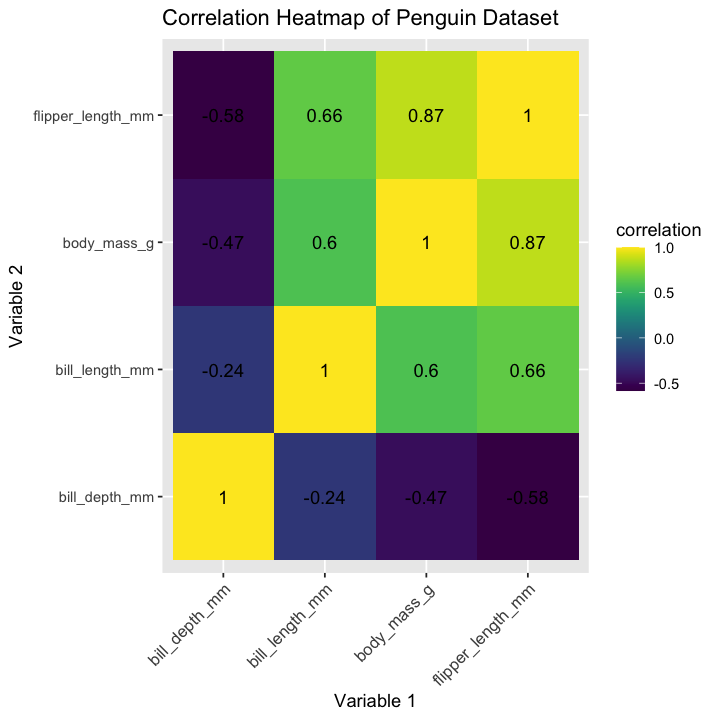

In [2]:
# Measure the execution time of a code block
start.time <- Sys.time()

# Load the necessary libraries
library(ggplot2)
library(tidyr)
library(viridis)
library(dplyr)

# load data stored in a CSV file
penguins <- read.csv('data/penguins.csv')

# Remove missing values
penguins <- na.omit(penguins)

# Set the default plot size
options(repr.plot.width=6, repr.plot.height=6)

# Select columns 3 to 6
selected_columns <- penguins[, 3:6]

# Calculate correlation matrix
correlation_matrix <- cor(selected_columns)

# Convert the correlation matrix to a dataframe
correlation_df <- as.data.frame(correlation_matrix)
rownames(correlation_df) <- colnames(correlation_matrix)

# Reshape the dataframe for ggplot
correlation_df <- correlation_df %>%
  tibble::rownames_to_column(var = "variable1") %>%
  pivot_longer(-variable1, names_to = "variable2", values_to = "correlation")

# Plot heatmap with viridis palette and correlation values
ggplot(correlation_df, aes(x = variable1, y = variable2, fill = correlation, label = round(correlation, 2))) +
  geom_tile() +
  geom_text(color = "black") +  # Add text labels
  scale_fill_viridis() +  # Use viridis color palette
  labs(title = "Correlation Heatmap of Penguin Dataset", x = "Variable 1", y = "Variable 2") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1, size = 10))  # Rotate x-axis labels by 45 degrees

end.time <- Sys.time()
print(end.time - start.time)